In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# --- 1. Define Genre Colors ---
# These are chosen to be distinct, thematically appropriate, and work together.
GENRE_COLORS = {
    "Romance": "#C89EA1",        # Muted Rose (slightly desaturated from before)
    "Young Adult": "#77A0A9",    # Dusty Teal / Desaturated Aquamarine
    "Historical": "#AF8C51",     # Aged Parchment / Old Gold (less bright than DarkGoldenrod)
    "Adventure": "#4A704F",      # Forest Green / Deep Olive (more natural, less 'sea')
    "Fantasy": "#6A4C93",        # Deep Amethyst / Muted Violet (richer, less primary purple)
    "Classics": "#8B5A2B",       # Rich Brown / Dark Leather (slightly darker, richer Sienna)
    "Mystery": "#5B7C8D",        # Muted Slate Blue / Deep Steel Blue (a bit softer)
    "Thriller": "#8C1C1C",       # Dark Crimson / Wine Red (deeper, less bright than Firebrick)
    "Science Fiction": "#929696",# Medium Gunmetal / Darker Slate Gray
    "Humor": "#D9A44E",          # Ochre / Muted Gold (less bright yellow, more earthy)
}

# Extract the list of colors in the defined order for the default cycler
# This order will be used if you just plot things sequentially without specifying genre
ORDERED_GENRE_COLORS = list(GENRE_COLORS.values())

# --- 2. Define the Theme Template Function ---
def apply_book_theme(font_family='serif', primary_text_color='#4A3B31', bg_color='#FAF0E6'):
    """
    Applies a minimalistic, book-themed style to Matplotlib and Seaborn plots.

    Args:
        font_family (str): Font family to use (e.g., 'serif', 'Georgia', 'Arial').
        primary_text_color (str): Hex color for text, labels, and ticks.
        bg_color (str): Hex color for the figure and axes background.
    """
    # Matplotlib rcParams
    plt.rcParams.update({
        'font.family': font_family,
        'font.size': 12,

        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'axes.labelcolor': primary_text_color,
        'axes.titlecolor': primary_text_color,

        'xtick.labelsize': 11,
        'ytick.labelsize': 11,
        'xtick.color': primary_text_color,
        'ytick.color': primary_text_color,

        'axes.edgecolor': primary_text_color,
        'axes.linewidth': 1.2,

        'grid.color': '#D3C0B0',  # Lighter, muted grid
        'grid.linestyle': '--',
        'grid.linewidth': 0.7,

        'figure.facecolor': bg_color, # Parchment-like background
        'axes.facecolor': bg_color,

        'legend.fontsize': 11,
        'legend.frameon': False, # No frame around legend
        'legend.title_fontsize': 12,

        # Set the default color cycle to our genre colors
        'axes.prop_cycle': plt.cycler(color=ORDERED_GENRE_COLORS),

        'patch.edgecolor': primary_text_color, # Edge color for bars, etc.
        'patch.force_edgecolor': True, # Ensure edgecolor is drawn for bar plots
    })

    # Seaborn specific styles
    sns.set_theme(
        style="whitegrid", # Start with a clean base, grid will be overridden by rcParams
        rc={
            'font.family': font_family,
            'figure.facecolor': bg_color,
            'axes.facecolor': bg_color,
            'axes.edgecolor': primary_text_color,
            'axes.labelcolor': primary_text_color,
            'xtick.color': primary_text_color,
            'ytick.color': primary_text_color,
            'text.color': primary_text_color,
            'grid.color': '#D3C0B0',
            'axes.prop_cycle': plt.cycler(color=ORDERED_GENRE_COLORS),
        }
    )
    # Further despine for minimalism
    sns.despine(left=False, bottom=False, top=True, right=True)


# --- 3. Apply the Theme ---
apply_book_theme(font_family='serif') # You can change 'Georgia' to 'serif' or other preferred font


<Figure size 640x480 with 0 Axes>

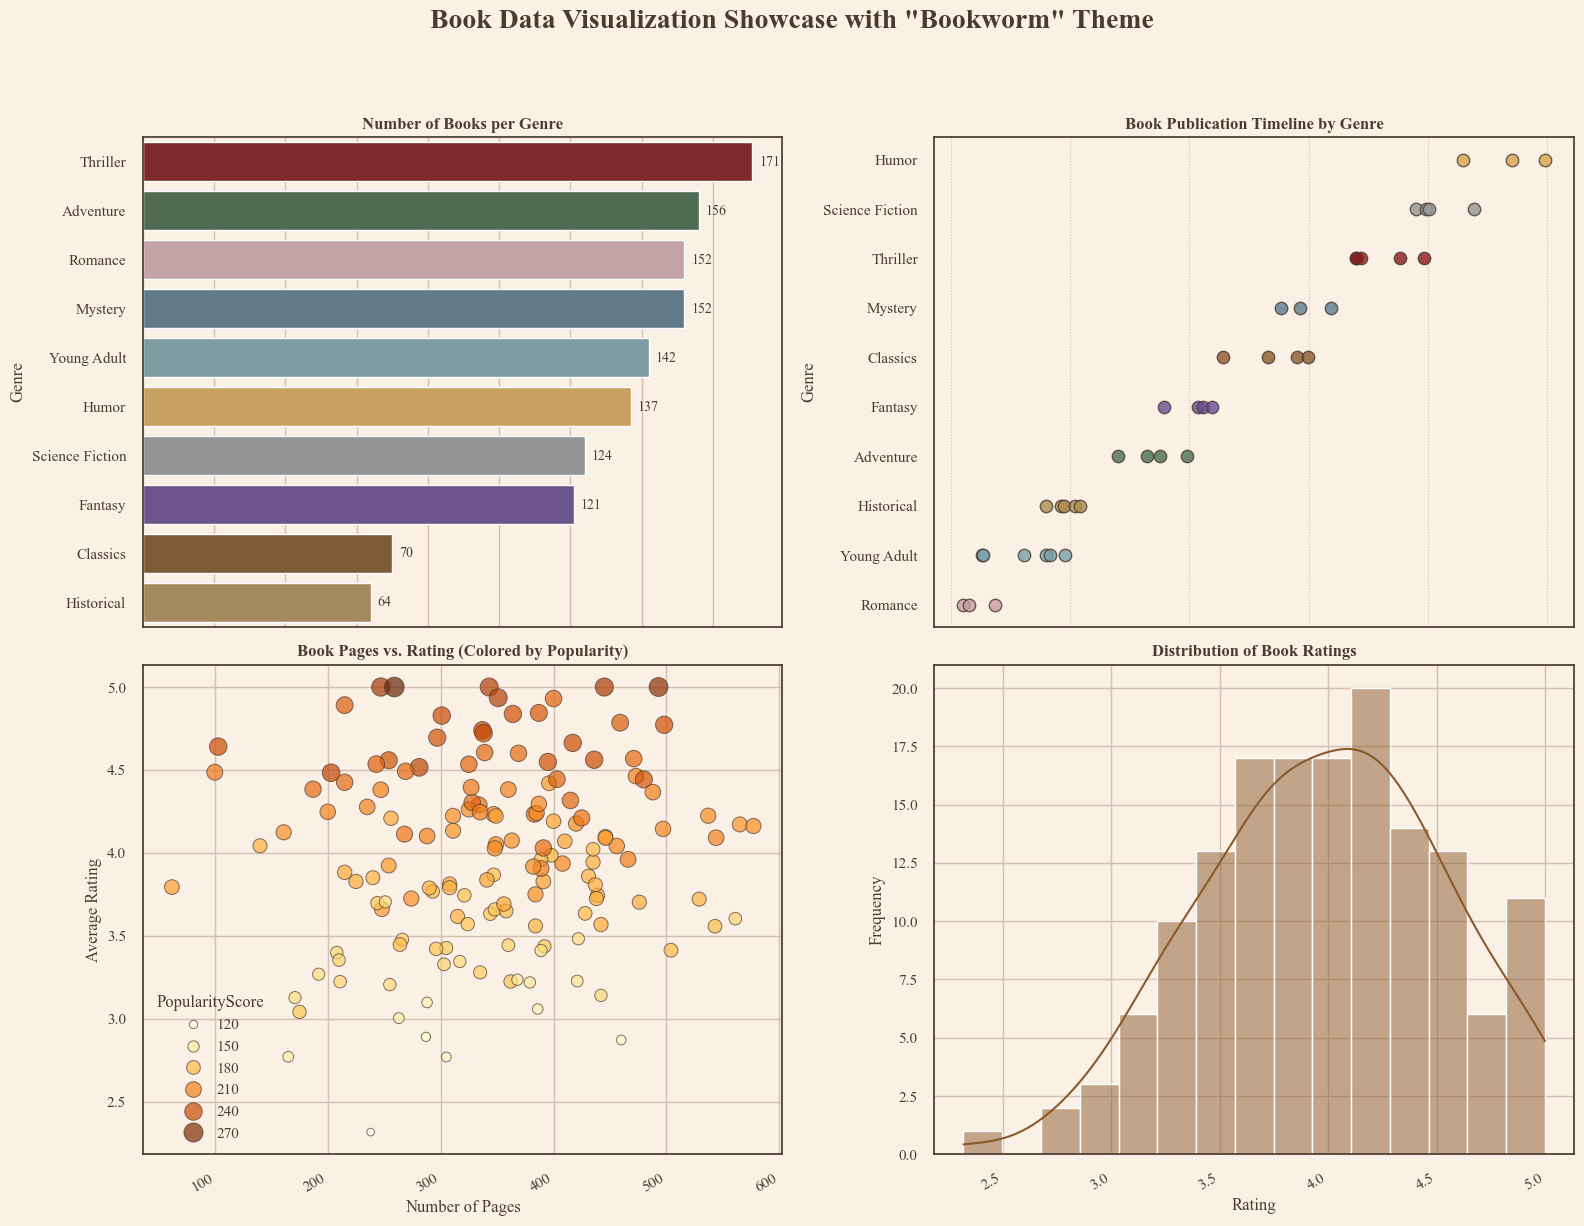

In [ ]:
np.random.seed(42) # for reproducibility
genres = list(GENRE_COLORS.keys())

# Data for Bar Chart (Book counts per genre)
bar_data = pd.DataFrame({
    'Genre': genres,
    'Count': np.random.randint(50, 200, size=len(genres))
}).sort_values('Count', ascending=False)

# Data for Timeline (Publication dates)
# Create more distinct publication dates
start_date = datetime(2000, 1, 1)
timeline_data_list = []
for i, genre in enumerate(genres):
    # Spread out main publication years per genre
    base_year = 2000 + i * 2
    num_books = np.random.randint(3, 7) # 3 to 6 books per genre for timeline
    for j in range(num_books):
        # Add some intra-year variation
        pub_date = datetime(base_year + np.random.choice([-1, 0, 1]), # +/- 1 year from base
                            np.random.randint(1, 13),
                            np.random.randint(1, 29))
        timeline_data_list.append({'Genre': genre, 'PublicationDate': pub_date, 'Title': f'{genre} Book {j+1}'})
timeline_data = pd.DataFrame(timeline_data_list)
timeline_data = timeline_data.sort_values('PublicationDate')


# Data for Scatter Plot (Pages vs. Rating)
scatter_data = pd.DataFrame({
    'Pages': np.random.normal(loc=350, scale=100, size=150).astype(int).clip(50, 800),
    'Rating': np.random.normal(loc=4.0, scale=0.5, size=150).clip(1, 5),
    'Genre': np.random.choice(genres, size=150)
})
# Add a continuous variable (e.g., 'SequelScore' to show continuous colormap)
scatter_data['PopularityScore'] = scatter_data['Rating'] * 50 + np.random.randn(150) * 10

# Data for Histogram (Distribution of book ratings)
histogram_data_ratings = scatter_data['Rating'] # Reuse ratings from scatter plot

# --- 5. Create the Grid of Plots ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) # Increased figure size for better readability
fig.suptitle('Book Data Visualization Showcase with "Bookworm" Theme', fontsize=20, y=1.02, color=plt.rcParams['axes.titlecolor'])

# --- Plot 1: Bar Chart (Genre Counts) ---
ax1 = axes[0, 0]
sns.barplot(x='Count', y='Genre', data=bar_data, ax=ax1, palette=GENRE_COLORS, hue='Genre', dodge=False, legend=False)
ax1.set_title('Number of Books per Genre')
ax1.set_xlabel('Number of Books')
ax1.set_ylabel('Genre')
for p in ax1.patches:
    ax1.annotate(f"{int(p.get_width())}",
                 (p.get_width(), p.get_y() + p.get_height() / 2.),
                 ha='left', va='center',
                 xytext=(5, 0), textcoords='offset points',
                 color=plt.rcParams['axes.labelcolor'], fontsize=10)
# sns.despine(ax=ax1, trim=True, top=True, right=True) # Despine is now part of the theme

# --- Plot 2: Timeline (Publication Dates by Genre) ---
ax2 = axes[0, 1]
# Create a numeric y-value for each genre to plot on the timeline
genre_to_y = {genre: i for i, genre in enumerate(genres)}
timeline_data['y_val'] = timeline_data['Genre'].map(genre_to_y)

for genre, color in GENRE_COLORS.items():
    genre_specific_data = timeline_data[timeline_data['Genre'] == genre]
    if not genre_specific_data.empty:
        ax2.scatter(genre_specific_data['PublicationDate'],
                    genre_specific_data['y_val'],
                    color=color,
                    label=genre, s=80, alpha=0.8, edgecolors=plt.rcParams['axes.edgecolor']) # Use theme edge color

ax2.set_yticks(list(genre_to_y.values()))
ax2.set_yticklabels(list(genre_to_y.keys()))
ax2.set_title('Book Publication Timeline by Genre')
ax2.set_xlabel('Publication Date')
ax2.set_ylabel('Genre')
ax2.grid(axis='x', linestyle=':', linewidth=0.8, color=plt.rcParams['grid.color']) # Keep x-grid subtle
ax2.grid(axis='y', linestyle='', linewidth=0) # Remove y-grid for clarity with y-tick labels
fig.autofmt_xdate(rotation=30, ha='right') # Format dates nicely
# ax2.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left') # Optional legend if needed

# --- Plot 3: Scatter Plot (Pages vs. Rating, colored by PopularityScore) ---
ax3 = axes[1, 0]
# Using a continuous colormap that fits the theme
# 'YlOrBr' (Yellow-Orange-Brown) or 'copper' are good choices for a book theme
continuous_cmap = "YlOrBr" # Or "copper", "OrRd"
scatter_plot = sns.scatterplot(
    x='Pages', y='Rating',
    hue='PopularityScore', # Color by continuous variable
    size='PopularityScore', # Size by continuous variable (optional)
    sizes=(30, 200),       # Range of sizes
    palette=continuous_cmap,
    data=scatter_data,
    ax=ax3,
    legend='auto', # Show legend for hue and size
    edgecolor=plt.rcParams['axes.edgecolor'], # Edge color for markers
    alpha=0.7
)
ax3.set_title('Book Pages vs. Rating (Colored by Popularity)')
ax3.set_xlabel('Number of Pages')
ax3.set_ylabel('Average Rating')
# sns.despine(ax=ax3, trim=True) # Handled by theme

# Get the legend object from the scatter plot
legend = ax3.get_legend()
if legend: # Check if legend exists
    # Modify legend properties if needed, e.g., move it
    # legend.set_title("Popularity & Size")
    # plt.setp(legend.get_texts(), color=plt.rcParams['text.color'])
    # plt.setp(legend.get_title(), color=plt.rcParams['text.color'])
    pass


# --- Plot 4: Histogram (Distribution of Ratings) ---
ax4 = axes[1, 1]
# We can pick a specific genre color, or use the default from the cycler
sns.histplot(histogram_data_ratings, kde=True, ax=ax4, color=GENRE_COLORS['Classics'], bins=15)
ax4.set_title('Distribution of Book Ratings')
ax4.set_xlabel('Rating')
ax4.set_ylabel('Frequency')
# sns.despine(ax=ax4, trim=True) # Handled by theme

# --- Final Adjustments ---
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to make space for suptitle
plt.show()
# Save extremely high quality 1:1 ratio svg plot
fig.savefig('bookworm_theme_visualization.svg', format='svg', dpi=300, bbox_inches='tight')